In [ ]:
import pandas as pd # 导入另一个包“pandas” 命名为 pd，理解成pandas是在 numpy 基础上的升级包
import numpy as np #导入一个数据分析用的包“numpy” 命名为 np
import matplotlib.pyplot as plt # 导入 matplotlib 命名为 plt，类似 matlab，集成了许多可视化命令
import math
#jupyter 的魔术关键字（magic keywords）
#在文档中显示 matplotlib 包生成的图形
# 设置图形的风格
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

data = pd.read_csv('lena_for_cross_domain_ht.csv') #载入数据文件
len(data) #查看数据长度
data_moli = pd.read_csv('moli_for_cross_domain_ht.csv') #载入数据文件
len(data_moli) #查看数据长度

In [19]:
import xlrd
import csv
 
def xlsx_to_csv(filename):
    workbook = xlrd.open_workbook(filename + '.xlsx')
    table = workbook.sheet_by_index(0)
    with open(filename + '_ht.csv', 'w', encoding='utf-8') as f:
        write = csv.writer(f)
        for row_num in range(table.nrows):
            row_value = table.row_values(row_num)
            if row_num == 0:
                write.writerow(row_value)
            if row_value[4] == 'How_to_configuration':
                write.writerow(row_value)
                print(row_value)
            else:
                continue
if __name__ == '__main__':
#     xlsx_to_csv('lena_for_cross_domain')

SyntaxError: unexpected EOF while parsing (<ipython-input-19-1119d7d36b99>, line 19)

In [7]:
import pandas as pd
def movestopwords(sentence):
    counts = {}
    for sen in sentence:
        for word in str(sen).split():
            if len(word) != 1:
                counts[word] = counts.get(word,0) + 1
    return counts

def drawcounts(counts, num):
    x_aixs = []
    y_aixs = []
    c_order = sorted(counts.items(),key=lambda x:x[1],reverse=True)
    for c in c_order[:num]:
        x_aixs.append(c[0])
        y_aixs.append(c[1])
    return y_aixs
time = data["case"]  
y = drawcounts(movestopwords(list(time)), 10000)
data_y = pd.DataFrame(y, columns=['y']) 
mean = data_y.mean()
print(mean)
std = data_y.std()
print(std)
time_moli = data_moli["case"]
y_moli = drawcounts(movestopwords(list(time_moli)), 10000)
data_y_moli = pd.DataFrame(y_moli, columns=['y']) 
mean_moli = data_y_moli.mean()
print(mean_moli)
std_moli = data_y_moli.std()
print(std_moli)

y    8.532269
dtype: float64
y    58.84637
dtype: float64
y    37.4891
dtype: float64
y    364.799764
dtype: float64


In [8]:
def gd(x, mu=0, sigma=1):
    """根据公式，由自变量x计算因变量的值
    Argument:
        x: array
            输入数据（自变量）
        mu: float
            均值
        sigma: float
            方差
    """
    left = 1 / (np.sqrt(2 * math.pi) * np.sqrt(sigma))
    right = np.exp(-(x - mu)**2 / (2 * sigma))
    return left * right

y1
y2
tu
show


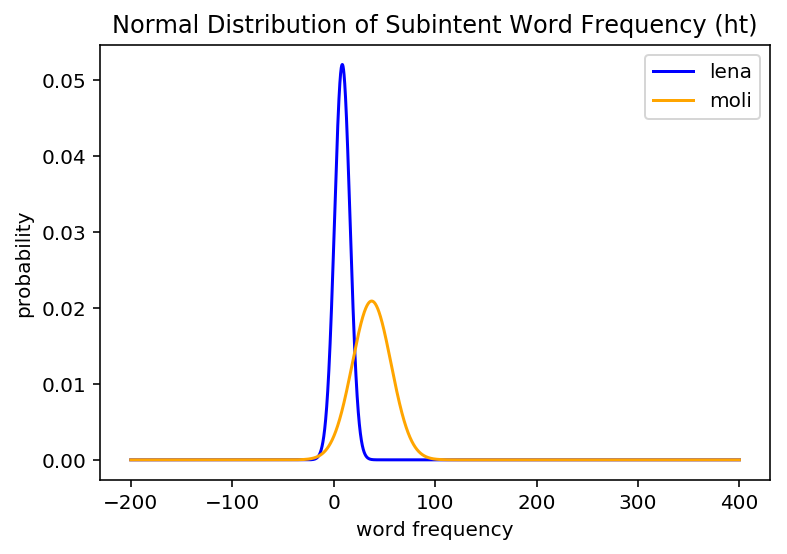

after show


In [10]:
# 设定 x 轴前两个数字是 X 轴的开始和结束，第三个数字表示步长，或者区间的间隔长度
x = np.arange(-200, 400, 0.01)

#设定 y 轴，载入刚才的正态分布函数
y1 = gd(x, float(mean), float(std))
plt.plot(x,y1,  color='blue')
y2 = gd(x, float(mean_moli), float(std_moli))
plt.plot(x,y2,  color='orange')
# plt.hist(data_y, bins=10, rwidth=0.9)
plt.title('Normal Distribution of Subintent Word Frequency (ht)')
plt.xlabel('word frequency')
plt.ylabel('probability')
plt.legend(labels=['lena', 'moli'])
plt.show()